# University of Bahrain
##  ITCS / ITSE 494 Selected Topics in Computer Science - Machine Learning
### Course Project - Face Mask detection
-------------------------------------------------------
#### Prepared By
* Ramsha Khalid 20168013
* Hessa Jassim Qubail 20161223
* Faiza Faisal Murtaza 20170523



### Introduction and Objectives
In this pandemic caused by Covid-19, it has become a necessity for everyone to wear protective face masks while they are in public. Aim of our project is to detect human faces and classify if the person is wearing a mask or not using various efficient ML algorithms and techniques.
Through this project, we will explore binary classification problem and learn:
* How to apply Convolutional Neural Networks to develop models 
* Predict through images whether a person is wearing mask or not. 
* Predict in real time images whether a person is wearing mask or not.


### Dataset
Since the pandemic is recent, we do not have a very large dataset available, but we did our research to find the best one. 
Selected dataset is taken from GitHub, which has 667 images without mask and 690 images with mask. 

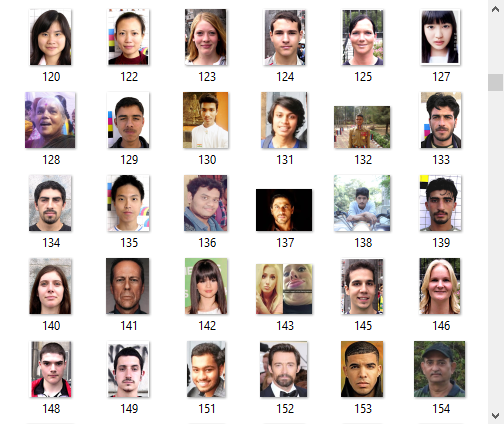 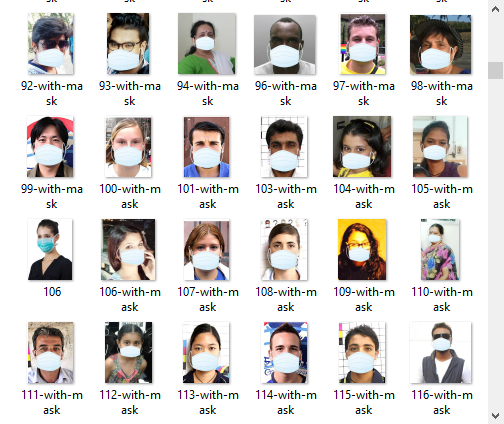

### Methodology
Project is based on a deep learning and classification problem. A deep neural network is used to detect and analyze faces and then classify them into two classes i.e., with mask and without mask.
Following libraries are used or required to install:
1.	*OpenCV* - Computer Vision library to detect faces
2.	*TensorFlow* – Math library used for training of deep neural networks
3.	*Keras* – Interface for TensorFlow 
4.	*Scikit-Learn* –Machine Learning Library for features various classifications and regression algorithms.

The steps followed to develop model are as follows:
1. Install required libraries
2. Load face mask dataset
3. Perform data pre-processing 
4. Train face mask classifier model using keras and TensorFlow
5. Save the best models to be used later.
6. Model performance evaluation using graphs and accuracy percentage for better visualization
7. Manual testing with random pictures outside the training and testing data
8. Last, load face mask classifier model and detect face mask in live recordings


### Results
The project showed an overall **96.03% accurate predictions** on the test data. While *~ 98 - 100% accuracy* was achieved in predicting the masks in a live video. 
Following graphs visualize the learning curves of over model.

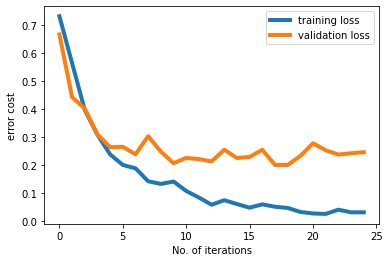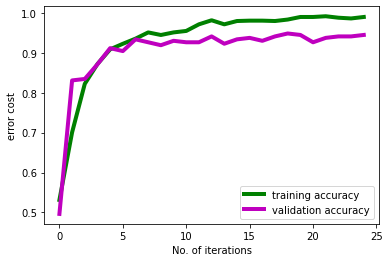

The learning curves show how the training and validation cost is minimized as the number of iterations increased. Also, a big difference between training and validation cost means model is fit and accurate to data.

On the other hand, training and validation accuracy is increasing as the number of iterations increased. Very low difference between the validation and training accuracy proves that model is accurate.

### Conclusion
In this project, we learnt how Convolutional neural networks are built and how layers are generated using functions like maxpooling2D, flatten and how input is passed to next layer and output is generated. How it is used for predicting binary classification, to deploy the model using CV2 and how various libraries like tensor flow and keras are used for Binary Classification for face mask image detection.

## Project Code

In [1]:
import cv2,os
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from keras.models import load_model

In [2]:
#get data categories from directory folders (with_mask and without_mask)
categories=os.listdir('data')

#get binary labels from textual labels
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'without_mask': 0, 'with_mask': 1}

In [3]:
img_size=100
data=[]
img_label=[]

for category in categories:
    folder=os.path.join('data',category)
    images=os.listdir(folder)
        
    for img in images:
        imgPath=os.path.join(folder,img)
        img=cv2.imread(imgPath)

        try:
            #change image to grayscale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            #resize image
            resized=cv2.resize(gray,(img_size,img_size))
            
            #add the resized image to array
            data.append(resized)
            
            #add the respective label to array
            img_label.append(label_dict[category])

        except Exception as e:
            #print error
            print('Error:',e)

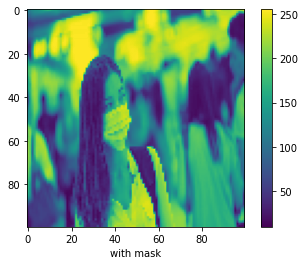

In [4]:
index = 1050
plt.figure()
plt.imshow((data[index]))
plt.colorbar()
plt.grid(False)
if (img_label[index]==0 ):
    cat = "without_mask"
else:
    cat = "with mask"
plt.xlabel(cat)
plt.show()

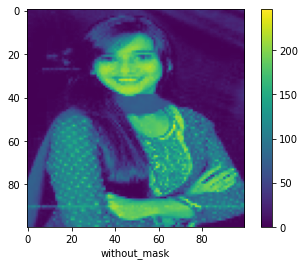

In [5]:
index = 0
plt.figure()
plt.imshow((data[index]))
plt.colorbar()
plt.grid(False)
if (img_label[index]==0 ):
    cat = "without_mask"
else:
    cat = "with mask"
plt.xlabel(cat)
plt.show()

In [6]:
#data scaling
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
img_label=np.array(img_label)
img_label=np_utils.to_categorical(img_label)

In [7]:
#CNN model
model=Sequential()

#First layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten output from second layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))

#Get final output in term of 2 categories
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
train_data,test_data,train_label,test_label=train_test_split(data,img_label,test_size=0.1)
train_data.shape,test_data.shape,train_label.shape,test_label.shape

((1358, 100, 100, 1), (151, 100, 100, 1), (1358, 2), (151, 2))

In [10]:
checkpoint = ModelCheckpoint('models/model-{epoch}.model',monitor='val_accuracy',verbose=0,save_best_only=False,mode='auto')
history=model.fit(train_data,train_label,epochs=25,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/25
34/34 [==============================] - 74s 2s/step - loss: 0.8099 - accuracy: 0.5068 - val_loss: 0.6667 - val_accuracy: 0.4963
INFO:tensorflow:Assets written to: models\model-1.model\assets
Epoch 2/25
34/34 [==============================] - 72s 2s/step - loss: 0.6106 - accuracy: 0.6472 - val_loss: 0.4422 - val_accuracy: 0.8309
INFO:tensorflow:Assets written to: models\model-2.model\assets
Epoch 3/25
34/34 [==============================] - 69s 2s/step - loss: 0.4259 - accuracy: 0.7988 - val_loss: 0.4019 - val_accuracy: 0.8346
INFO:tensorflow:Assets written to: models\model-3.model\assets
Epoch 4/25
34/34 [==============================] - 67s 2s/step - loss: 0.3081 - accuracy: 0.8781 - val_loss: 0.3093 - val_accuracy: 0.8713
INFO:tensorflow:Assets written to: models\model-4.model\assets
Epoch 5/25
34/34 [==============================] - 69s 2s/step - loss: 0.2495 - accuracy: 0.8989 - val_loss: 0.2636 - val_accuracy: 0.9118
INFO:tensorflow:Assets written to: models\model-

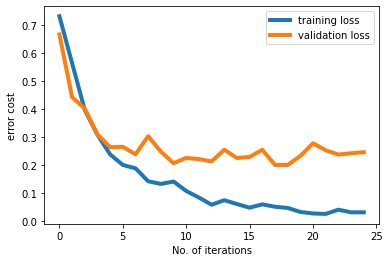

In [55]:
plt.plot(history.history['loss'],label='training loss',linewidth=4)
plt.plot(history.history['val_loss'],label='validation loss',linewidth=4)
plt.xlabel('No. of iterations')
plt.ylabel('error cost')
plt.legend()
plt.show()

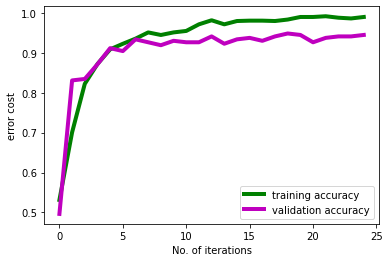

In [54]:
plt.plot(history.history['accuracy'],'g',label='training accuracy',linewidth=4)
plt.plot(history.history['val_accuracy'],'m-',label='validation accuracy',linewidth=4)
plt.xlabel('No. of iterations')
plt.ylabel('error cost')
plt.legend()
plt.show()

In [61]:
accuracy =  model.evaluate(test_data,test_label)
print("Accuracy % = " , np.round(accuracy[1]*100), "%")

5/5 [==============================] - 2s 436ms/step - loss: 0.1486 - accuracy: 0.9603
Accuracy % =  96.0 %


## Random testing

In [2]:
#load the best model
model = load_model('models/model-18.model')
labels={1:'mask',0:'no mask'}
color={1:(0,255,0),0:(0,0,255)}

Predicted =  no mask


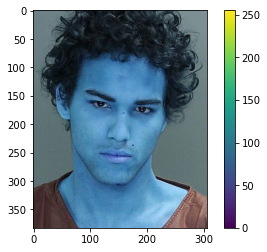

In [5]:
img = cv2.imread('manual-test/456.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
label=np.argmax(result,axis=1)[0]

print("Predicted = " , labels[label])
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)

plt.show()

Predicted =  mask


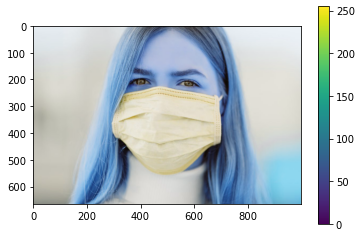

In [6]:
img = cv2.imread('manual-test/123.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
label=np.argmax(result,axis=1)[0]

print("Predicted = " , labels[label])
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)

plt.show()

## Live Testing
Press esc to stop

In [11]:
face=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(0)

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
        text = labels[label] + " " +  str(np.around(np.max(result)*100, decimals = 2)) + "%"
        
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color[label],-1)
        cv2.putText(img, text, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Live Face mask detection',img)
    key=cv2.waitKey(1)
    
    #esc to close camera
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## Task division

          Task Assigned	                           Members
           Data Preprocessing	                   Ramsha, Hessa
           Build and Train mask Classifier	       Faiza, Ramsha, Hessa
           Model Evaluation	                       Faiza
           Manual Testing	                       Hessa
           Live Testing	                           Ramsha
           Video Recording	                       Ramsha
           Project Report	                       Faiza
           Presentation	                           Hessa
